# Rute Keliling UGM
Program mencari rute kunjungan fakultas di UGM menggunakan algoritma genetika.


## Fungsi Algoritma Genetika

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.2 MB/s eta 0:00:00
time: 289 µs (started: 2023-11-21 08:11:29 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

time: 333 ms (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
# GENERATE POPULASI
def createPopulation():
  # populasi sebanyak n kromosom dengan masing-masing isi m gen
  pop = np.zeros((n,m), dtype=int)

  # permutasi urutan titik kunjungan sebanyak n (ukuran populasi)
  for i in range(n):
    pop[i] = np.random.permutation(titik_kunjungan)

  pop = pd.DataFrame(pop)

  return pop

# FUNGSI FITNESS
def fitness(pop):
  # array untuk menyimpan nilai fitness n kromosom/individu
  fitness = np.zeros(len(pop), dtype=float)

  for k in range(n):
    a = pop.loc[k]
    # print(a)
    b = 0

    # Total jarak = total jarak antar titik yg dikunjungi + jarak titik awal ke titik kunjungan pertama + jarak titik kunjungan terakhir ke titik awal
    for i in range(0, m-1):
      b += jarak[a[i],a[i+1]]

    b = b + jarak[0,a[0]] + jarak[a[m-1],0]
    fitness[k] = b

  pop['fitness'] = fitness
  return pop

# SELECTION (random relection)
def randomSelection():
  position = np.random.permutation(n)
  return position[:mp]

# MUTATION: SWAP MUTATION (exchange 2 gen)
def mutation(pop):
  popm = pop.copy()

  for i in range(n):
    #mendapatkan 2 posisi yg ingin dimutasi
    position = np.random.permutation(m)
    a = position[0]
    b = position[1]
    print('Individu index',i,': exchange gen index',a,'dan',b)
    print()
    temp = popm.loc[i,a]
    popm.loc[i,a] = popm.loc[i,b]
    popm.loc[i,b] = temp
    print(popm)
  return popm

# mendapatkan best solution/individu dari populasi
def bestSolution(pop,n):
  best = pop.sort_values(by=['fitness']).head(n)
  return best

def bestFitness(pop):
  best = pop.sort_values(by=['fitness']).head(1)
  return best['fitness'].values[0]


# menggabungkan populasi lama dengan individu-individu baru hasil mutasi
# penggabungan -> hapus duplikat -> indexing
def combinePopulation(pop,popm):
  popAll = pd.concat([pop,popm])
  popAll = popAll.drop_duplicates()
  popAll.index = range(len(popAll))
  return popAll

def sort(popAll):
  popAll = popAll.sort_values(by=['fitness'])
  popAll.index = range(len(popAll))
  return popAll

# eliminasi penggabungan populasi lama dengan individu baru
# menghasilkan populasi baru dengan jumlah sesuai n
def elimination(popAll):
  pop = popAll.head(n)
  return pop

# tampilkan hasil akhir algoritma genetika
def finalResult(pop):
  top3 = pop.sort_values(by=['fitness']).head(3)
  top3_f = top3['fitness'].values
  top3 = top3.drop(columns=['fitness']).to_numpy()
  # print(top3)
  # print(top3_f)

  print('REKOMENDASI RUTE')
  for i in range(len(top3)):
    print('Result:')
    print('Total Jarak Tempuh:',round(top3_f[i],2),'km')
    print('Rute: GSP -', end=' ')
    for j in range(m):
      print(label[top3[i][j]],end=' - ')
    print('GSP')
    print()


time: 4.34 ms (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
# CROSSOVER
def titikPotongKromosom():
  a = random.randint(0,math.floor(m/2))
  b = a + random.randint(1,math.floor(m/2))
  return a,b

# a, b = titikPotongKromosom()
# print(a)
# print(b)

time: 936 µs (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
def crossover(parent1, parent2):
    a, b = titikPotongKromosom()
    print('Index titik Potong Kromosom: ', a, 'dan', b)

    child1 = np.full(m, -1, dtype=int)
    child2 = np.full(m, -1, dtype=int)

    # Salin gen dari parent ke child tanpa duplikat
    child1[a:b+1] = parent1[a:b+1]
    child2[a:b+1] = parent2[a:b+1]

    # Isi nilai yang belum ada di child
    idx1 = 0
    idx2 = 0
    for i in range(m):
        if child1[i] == -1:
            while parent2[idx2] in child1:
                idx2 += 1
            child1[i] = parent2[idx2]
            idx2 += 1

        if child2[i] == -1:
            while parent1[idx1] in child2:
                idx1 += 1
            child2[i] = parent1[idx1]
            idx1 += 1

    print('CROSSOVER')
    print('Parents:')
    print('parent1:', parent1)
    print('parent2:', parent2)
    print('Hasil Crossover:')
    print(child1)
    print(child2)

    return child1, child2

time: 2.17 ms (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
# CROSSOVER
def dCrossover(pop):
  children_pop = np.zeros((n,m), dtype=int)
  parents_idx = randomSelection()
  print('Mating Pool:',parents_idx)
  pop = pop.drop(columns=['fitness']).to_numpy()

  for i in range(0,len(parents_idx),2):
    ch1,ch2 = crossover(pop[parents_idx[i]],pop[parents_idx[i+1]])
    children_pop[i] = ch1
    children_pop[i+1] = ch2

  children_pop = pd.DataFrame(children_pop)
  return children_pop

time: 1.03 ms (started: 2023-11-21 08:11:30 +00:00)


## Data dan Parameter

In [ ]:
# DATA
label = ['GSP','Kehutanan','FKKMK','Kedokteran Hewan','Kedokteran Gigi',
        'Fisipol','FIB','Hukum','FMIPA','Pertanian',
        'Peternakan','Psikologi','Teknik','Teknologi Pertanian','Sekolah Vokasi',
        'Geografi','Filsafat','Farmasi','FEB','Biologi']

jarak = np.array([[0,0.9,1.1,1.1,1.2,0.4,0.18,0.6,0.75,0.85,1.2,0.5,1.3,0.5,1.1,0.85,0.5,0.85,0.11,0.95],
         [0.9,0,1,0.75,1.2,0.5,0.8,0.75,0.6,0.27,0.7,1,1.1,0.4,1.3,0.55,0.8,0.75,0.8,0.35],
         [1.1,1,0,1.8,0.4,1.6,1.9,1.8,0.45,1.3,1.7,2,0.7,1.4,0.85,0.8,1.8,0.35,1,0.7],
         [1.1,0.75,1.8,0,1.9,0.7,1,0.7,1.3,0.5,0.17,0.95,1.8,0.7,2,1.3,0.75,1.5,1,1.1],
         [1.2,1.2,0.4,1.9,0,1.7,2,1.9,0.6,1.5,1.9,2,0.8,1.6,0.95,0.9,2,0.5,1.1,0.85],
         [0.4,0.5,1.6,0.7,1.7,0,0.3,0.27,1.1,0.45,0.8,0.55,1.6,0.11,1.4,1.1,0.35,1.3,0.3,0.9],
         [0.18,0.8,1.9,1,2,0.3,0,0.4,1.4,0.75,1.1,0.3,1.9,0.4,1.2,1.4,0.3,1.6,0.12,1.2],
         [0.6,0.75,1.8,0.7,1.9,0.27,0.4,0,1.3,0.55,0.75,0.35,1.8,0.35,1.5,1.3,0.12,1.5,0.55,1.1],
         [0.75,0.6,0.45,1.3,0.6,1.1,1.4,1.3,0,0.85,1.3,1.6,0.6,1,1.1,0.35,1.4,0.35,0.65,0.3],
         [0.85,0.27,1.3,0.5,1.5,0.45,0.75,0.55,0.85,0,0.45,0.8,1.3,0.35,1.5,0.8,0.6,1,0.75,0.65],
         [1.2,0.7,1.7,0.17,1.9,0.8,1.1,0.75,1.3,0.45,0,1,1.7,0.8,2,1.2,0.8,1.5,1.1,1.1],
         [0.5,1,2,0.95,2,0.55,0.3,0.35,1.6,0.8,1,0,2.1,0.6,1.1,1.6,0.21,1.8,0.4,1.4],
         [1.3,1.1,0.7,1.8,0.8,1.6,1.9,1.8,0.6,1.3,1.7,2.1,0,1.5,1.4,0.9,1.9,0.8,1.7,0.7],
         [0.5,0.4,1.4,0.7,1.6,0.11,0.4,0.35,1,0.35,0.8,0.6,1.5,0,1.5,1,0.4,1.2,0.4,0.8],
         [1.1,1.3,0.85,2,0.95,1.4,1.2,1.5,1.1,1.5,2,1.1,1.4,1.5,0,1.2,1.3,0.8,1.1,1.3],
         [0.85,0.55,0.8,1.3,0.9,1.1,1.4,1.3,0.35,0.8,1.2,1.6,0.9,1,1.2,0,1.4,0.65,0.75,0.35],
         [0.5,0.8,1.8,0.75,2,0.35,0.3,0.12,1.4,0.6,0.8,0.21,1.9,0.4,1.3,1.4,0,1.6,0.4,1.2],
         [0.85,0.75,0.35,1.5,0.5,1.3,1.6,1.5,0.35,1,1.5,1.8,0.8,1.2,0.8,0.65,1.6,0,0.75,0.65],
         [0.11,0.8,1,1,1.1,0.3,0.12,0.55,0.65,0.75,1.1,0.4,1.7,0.4,1.1,0.75,0.4,0.75,0,0.85],
         [0.95,0.35,0.7,1.1,0.85,0.9,1.2,1.1,0.3,0.65,1.1,1.4,0.7,0.8,1.3,0.35,1.2,0.65,0.85,0]])

time: 1.89 ms (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
# banyak titik
m = 7

# banyak kromosom/individu dalam populasi
n = 10

# jumlah generasi maksimal
N = 50

# mating pool size
mp = 10

# INPUT DAFTAR TITIK YANG INGIN DIKUNJUNGI
titik_kunjungan = [1,2,3,4,5,6,7]

print("Fakultas yang dikunjungi adalah:")
for i in range(len(titik_kunjungan)):
  print("-",label[titik_kunjungan[i]])

Fakultas yang dikunjungi adalah:
- Kehutanan
- FKKMK
- Kedokteran Hewan
- Kedokteran Gigi
- Fisipol
- FIB
- Hukum
time: 1.4 ms (started: 2023-11-21 08:11:30 +00:00)


## Main Program

In [ ]:
# ALGORITMA GENETIKA
pop = createPopulation()
pop = fitness(pop)
print('Populasi Awal:')
print(pop)
print()
print('Best Solutions Populasi Awal: ')
print(bestSolution(pop,3))

best_history = [bestFitness(pop)]

Populasi Awal:
   0  1  2  3  4  5  6  fitness
0  7  1  2  3  4  6  5     8.75
1  4  1  7  3  5  2  6     8.23
2  4  3  7  1  2  6  5     8.15
3  7  2  6  3  4  5  1    10.30
4  3  6  7  5  1  4  2     5.97
5  3  1  4  6  7  2  5     9.25
6  6  1  3  2  7  4  5     9.33
7  1  3  6  7  4  5  2     9.35
8  2  7  1  3  4  5  6     8.48
9  4  3  7  1  6  5  2     8.35

Best Solutions Populasi Awal: 
   0  1  2  3  4  5  6  fitness
4  3  6  7  5  1  4  2     5.97
2  4  3  7  1  2  6  5     8.15
1  4  1  7  3  5  2  6     8.23
time: 36.1 ms (started: 2023-11-21 08:11:30 +00:00)


In [ ]:
# bagian loop AlGen
for i in range(1,N+1):
  print('<<<<<<<<<<<<<<<<<<LOOP ke-',i,'>>>>>>>>>>>>>>>>>>>>>>>>')
  # crossover
  popc = dCrossover(pop)
  print('CROSSOVER OK')
  # popc = fitness(popc)
  # print('FITNESS CHILDREN OK')

  #mutasi
  popm = mutation(popc)
  print('MUTASI OK')
  popm = fitness(popm)
  print('HITUNG FITNESS HASIL MUTASI OK')
  print(popm)

  #menggabungkan populasi lama dan populasi baru
  popAll = combinePopulation(pop,popm)
  # sort individu berdasarkan fitness dan eliminasi
  popAll = sort(popAll)
  # update populasi
  pop = elimination(popAll)
  print('UPDATE GENERASI BERHASIL')

  print()
  print('Best Solutions Populasi ke-',i,':')
  print(bestSolution(pop,3))

  best_history.append(bestFitness(pop))

Streaming output truncated to the last 5000 lines.
CROSSOVER
Parents:
parent1: [6 7 3 5 1 2 4]
parent2: [6 7 5 3 1 2 4]
Hasil Crossover:
[6 7 5 3 1 2 4]
[6 7 3 5 1 2 4]
Index titik Potong Kromosom:  1 dan 4
CROSSOVER
Parents:
parent1: [6 7 5 3 1 4 2]
parent2: [6 5 3 7 1 2 4]
Hasil Crossover:
[6 7 5 3 1 2 4]
[6 5 3 7 1 4 2]
Index titik Potong Kromosom:  0 dan 1
CROSSOVER
Parents:
parent1: [6 7 3 5 1 4 2]
parent2: [6 3 7 5 1 4 2]
Hasil Crossover:
[6 7 3 5 1 4 2]
[6 3 7 5 1 4 2]
CROSSOVER OK
Individu index 0 : exchange gen index 1 dan 5

   0  1  2  3  4  5  6
0  7  2  5  3  1  6  4
1  6  3  7  5  1  2  4
2  6  5  7  3  1  2  4
3  5  7  6  3  1  2  4
4  6  7  5  3  1  2  4
5  6  7  3  5  1  2  4
6  6  7  5  3  1  2  4
7  6  5  3  7  1  4  2
8  6  7  3  5  1  4  2
9  6  3  7  5  1  4  2
Individu index 1 : exchange gen index 0 dan 3

   0  1  2  3  4  5  6
0  7  2  5  3  1  6  4
1  5  3  7  6  1  2  4
2  6  5  7  3  1  2  4
3  5  7  6  3  1  2  4
4  6  7  5  3  1  2  4
5  6  7  3  5  1  2  

## History

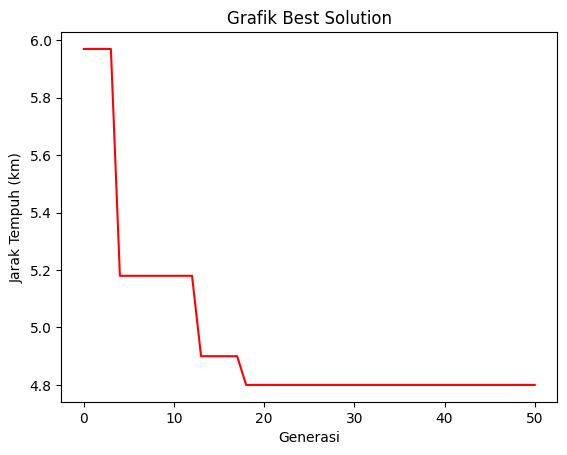

time: 257 ms (started: 2023-11-21 08:11:35 +00:00)


In [ ]:
# print(best_history)
# len(best_history)

x = np.arange(0,len(best_history))
y = np.array(best_history)

plt.title("Grafik Best Solution")
plt.xlabel("Generasi")
plt.ylabel("Jarak Tempuh (km)")
plt.plot(x, y, color ="red")
plt.show()

## HASIL AKHIR

In [ ]:
finalResult(pop)

REKOMENDASI RUTE
Result:
Total Jarak Tempuh: 4.8 km
Rute: GSP - FIB - Fisipol - Hukum - Kedokteran Hewan - Kehutanan - FKKMK - Kedokteran Gigi - GSP

Result:
Total Jarak Tempuh: 4.9 km
Rute: GSP - FIB - Hukum - Fisipol - Kedokteran Hewan - Kehutanan - FKKMK - Kedokteran Gigi - GSP

Result:
Total Jarak Tempuh: 4.9 km
Rute: GSP - FIB - Fisipol - Hukum - Kedokteran Hewan - Kehutanan - Kedokteran Gigi - FKKMK - GSP

time: 9.17 ms (started: 2023-11-21 08:11:35 +00:00)
